In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("E:/Imarticus/Semester 2/Machine learning Python/Time series project/2-Projects-Time Series/2-Projects/Dataset/Super_Store.csv", parse_dates = ['Order Date','Ship Date'], encoding = 'cp1252')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [6]:
## Minimum Date
min(df['Order Date'])

Timestamp('2014-01-06 00:00:00')

In [7]:
## Maximum Date
max(df['Order Date'])

Timestamp('2017-12-30 00:00:00')

In [8]:
df_sales = df.loc[:,['Order Date', 'Sales']]

In [9]:
## Renaming columns
df_sales.columns = ['Order_Date', 'Sales']

In [10]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order_Date  2121 non-null   datetime64[ns]
 1   Sales       2121 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 33.3 KB


In [11]:
df_sales.set_index('Order_Date', inplace = True)

In [12]:
df_sales.head()

,Sales
Order_Date,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775
2014-06-09,48.8600
2014-06-09,1706.1840


## Creating Daily sales into Monthly Sales using resample()

In [13]:
df_monthly_sales = df_sales.resample('MS').sum().round(2)

In [14]:
df_monthly_sales.head()

,Sales
Order_Date,
2014-01-01,6242.52
2014-02-01,1839.66
2014-03-01,14573.96
2014-04-01,7944.84
2014-05-01,6912.79


In [15]:
df_monthly_sales['2014':'2014']

,Sales
Order_Date,
2014-01-01,6242.52
2014-02-01,1839.66
2014-03-01,14573.96
2014-04-01,7944.84
2014-05-01,6912.79
2014-06-01,13206.13
2014-07-01,10821.05
2014-08-01,7320.35
2014-09-01,23816.48


## Visualizing the time series data

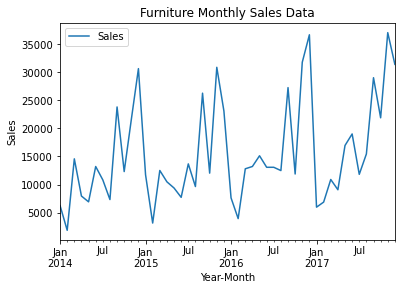

In [16]:
df_monthly_sales.plot()
plt.title('Furniture Monthly Sales Data')
plt.xlabel("Year-Month")
plt.ylabel('Sales')
plt.show()

## Test for Stationary

In [17]:
from statsmodels.tsa.stattools import adfuller, kpss

In [18]:
## ADF Test
## Null Hypothesis = Non-Stationary
## Alternate Hypothesis = Stationary

In [19]:
res = adfuller(df_monthly_sales, autolag = 'AIC')
print("P-Value :", res[1])

P-Value : 8.450799287108568e-05


In [20]:
## KPSS Test
## Null Hypothesis = Stationary
## Alternate Hypothesis = Non-Stationary

In [21]:
kpss_res = kpss(df_monthly_sales)

In [22]:
kpss_res[1]

0.0453687119513312

## Decomposing time series

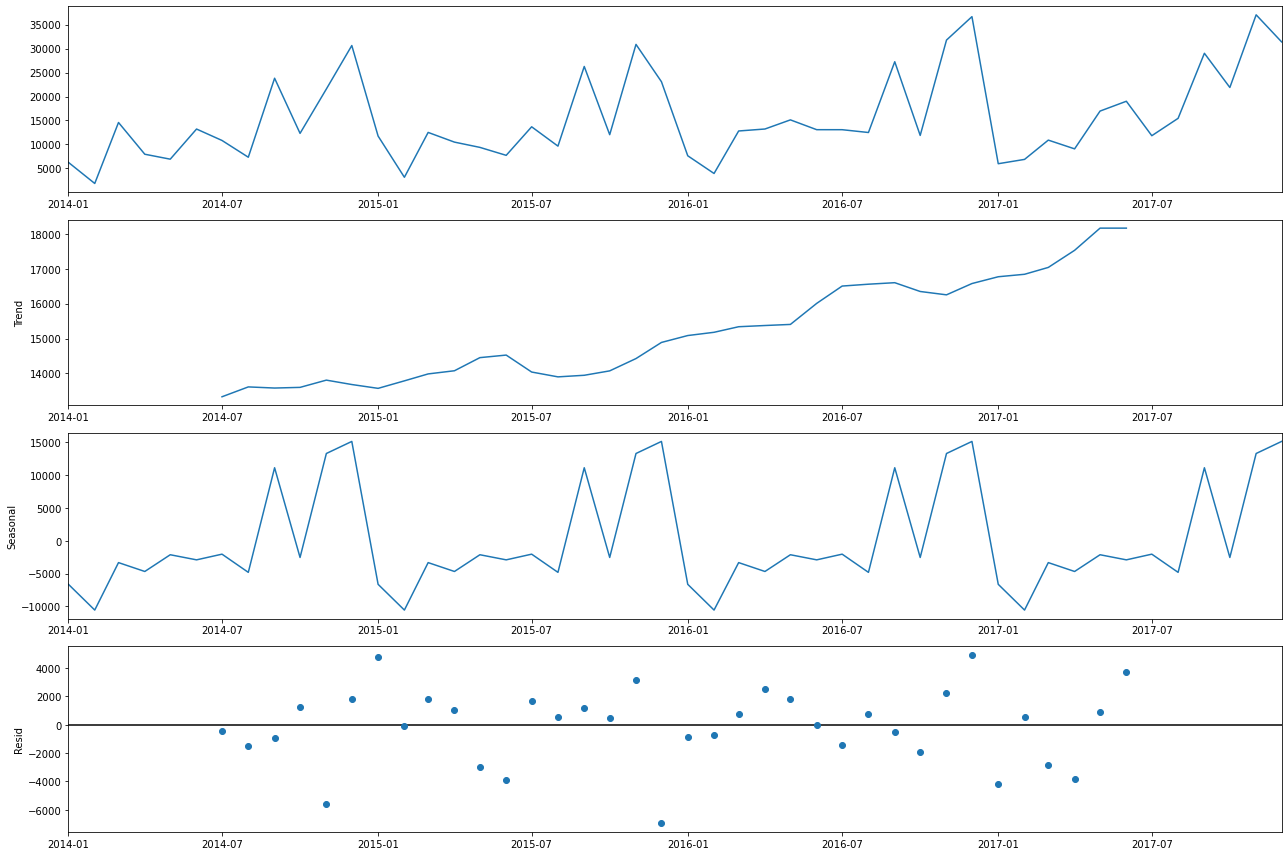

In [23]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18,12
decomposition = sm.tsa.seasonal_decompose(df_monthly_sales, model = 'addictive')
fig = decomposition.plot()
plt.show()

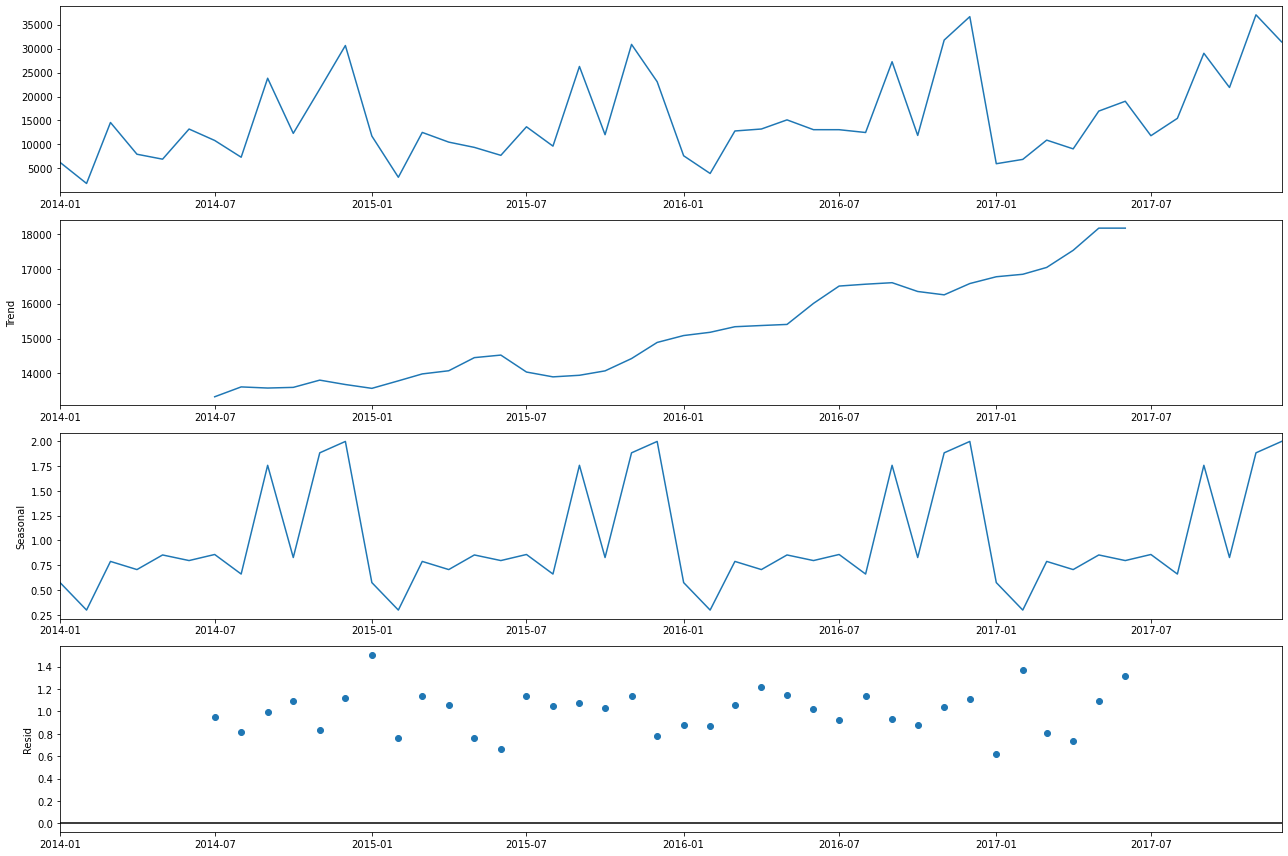

In [24]:
rcParams['figure.figsize'] = 18,12
decomposition = sm.tsa.seasonal_decompose(df_monthly_sales, model = 'multiplicative')
fig = decomposition.plot()
plt.show()

## Forecasting the model

In [25]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p, d,q))
seasonal_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p,d,q))]

In [26]:
## We will be building all these models
for i in range(len(pdq)):
    print('SARIMAX: {} x {}'.format(pdq[i], seasonal_pdq[i]))

SARIMAX: (0, 0, 0) x (0, 0, 0, 12)
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (1, 0, 0) x (1, 0, 0, 12)
SARIMAX: (1, 0, 1) x (1, 0, 1, 12)
SARIMAX: (1, 1, 0) x (1, 1, 0, 12)
SARIMAX: (1, 1, 1) x (1, 1, 1, 12)


## Building the time series model

In [34]:
import warnings
warnings.filterwarnings("ignore")
aic_scores = {}
i = 1
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_monthly_sales, order = param, seasonal_order = param_seasonal,
                                           enforce_stationarity = False, enforce_invertibility = False)
            results = mod.fit()
            print('{}: ARIMA{}x{} - AIC:{}'.format(i,param,param_seasonal,results.aic))
            aic_scores[i] = results.aic
            i += 1
        except:
            continue

1: ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1056.7150878428556
2: ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1227.673140632224
3: ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:691.3931452113369
4: ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:458.1256323313009
5: ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:711.249281531994
6: ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1326.2282176932213
7: ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:475.9267359023421
8: ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:455.2614602393308
9: ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1015.759409127312
10: ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:5512.337302650029
11: ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:674.6304739106718
12: ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:440.2590307526666
13: ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:779.6594253920416
14: ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:4828.355905216111
15: ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:476.78163210183095
16: ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:438.26416475627633
17: ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:984.8655333661368
18: ARIMA(0, 1, 0)x(0, 0, 1, 12) - AI

In [35]:
min(aic_scores, key = aic_scores.get)

28

In [42]:
final_model = sm.tsa.statespace.SARIMAX(df_monthly_sales, order = (0,1,1), seasonal_order = (0,1,1,12),
                                           enforce_stationarity = False, enforce_invertibility = False)

In [43]:
final_results = final_model.fit()

In [44]:
final_results.aic

418.3603253175509

## Validating the forecast

In [48]:
## Set forecasts to start at 2017-01-01 to end of the data to forecast
pred = final_results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)

In [49]:
## printing the predicted values
pred.predicted_mean

Order_Date
2017-01-01    12400.657203
2017-02-01     7354.851814
2017-03-01    16336.883717
2017-04-01    15688.964870
2017-05-01    16495.712752
2017-06-01    14873.410555
2017-07-01    16085.139286
2017-08-01    14525.061573
2017-09-01    29603.644998
2017-10-01    14657.513760
2017-11-01    34298.315126
2017-12-01    37331.553388
Freq: MS, Name: predicted_mean, dtype: float64

             lower Sales   upper Sales
Order_Date                            
2017-01-01   1969.282175  22832.032231
2017-02-01  -3072.520369  17782.223997
2017-03-01   5914.716816  26759.050618
2017-04-01   5271.254076  26106.675663
2017-05-01   6081.822027  26909.603477
2017-06-01   4462.797028  25284.024082
2017-07-01   5677.336996  26492.941577
2017-08-01   4119.668107  24930.455039
2017-09-01  19200.310404  40006.979592
2017-10-01   4255.931226  25059.096294
2017-11-01  23898.213067  44698.417185
2017-12-01  26932.688671  47730.418104


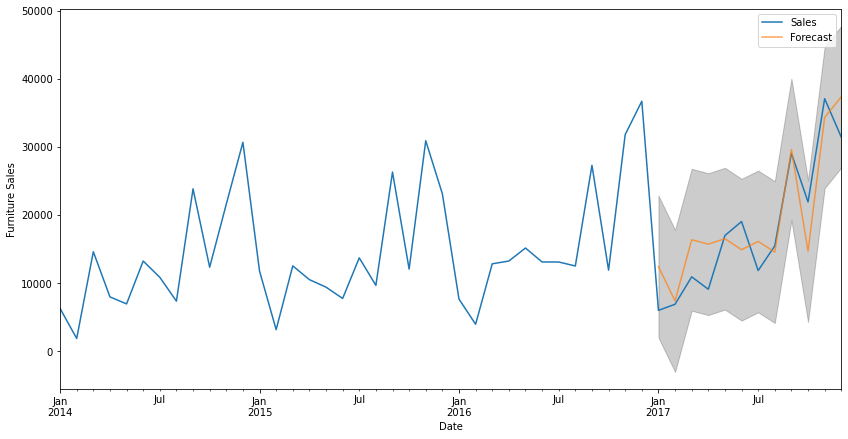

In [74]:
pred_ci = pred.conf_int()
print(pred_ci)
ax = df_monthly_sales['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax =ax, label = 'Forecast', alpha = .7, figsize = (14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0],pred_ci.iloc[:,1], color = 'k', alpha = .2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

## Calculating MSE and RMSE

In [63]:
y_actual = df_monthly_sales['2017':]

In [64]:
y_predicted = pred.predicted_mean.values

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [69]:
mean_squared_error(y_predicted, y_actual)

20568870.109157506

In [70]:
sqrt(mean_squared_error(y_predicted, y_actual))

4535.2916233862525

## Predicting for future time frame

In [76]:
future_pred = final_results.get_prediction(start = pd.to_datetime('2018-01-01'), end = pd.to_datetime('2018-12-01'))
future_pred.predicted_mean

2018-01-01     9538.851805
2018-02-01     9264.623834
2018-03-01    14364.139086
2018-04-01    12874.460646
2018-05-01    19345.094273
2018-06-01    20599.767969
2018-07-01    15148.588739
2018-08-01    17726.246483
2018-09-01    31619.650301
2018-10-01    22807.477331
2018-11-01    38834.017248
2018-12-01    35010.094559
Freq: MS, Name: predicted_mean, dtype: float64

In [77]:
future_pred.conf_int()

,lower Sales,upper Sales
2018-01-01,-858.945280,19936.648891
2018-02-01,-1156.016459,19685.264128
2018-03-01,3920.905559,24807.372613
2018-04-01,2408.679767,23340.241524
2018-05-01,8856.811541,29833.377005
2018-06-01,10089.028279,31110.507659
2018-07-01,4615.436125,25681.741352
2018-08-01,7170.723813,28281.769152
2018-09-01,21041.798898,42197.501705
2018-10-01,12207.336485,33407.618176
